# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 205 instances and 14 features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/Automobile_data1.csv')
df.head()

symboling         make fuel-type   body-style drive-wheels  wheel-base  \
0          3  alfa-romero       gas  convertible          rwd        88.6   
1          3  alfa-romero       gas  convertible          rwd        88.6   
2          1  alfa-romero       gas    hatchback          rwd        94.5   
3          2         audi       gas        sedan          fwd        99.8   
4          2         audi       gas        sedan          4wd        99.4   

   length  width  height  horsepower  peak-rpm  highway-mpg  city-mpg  price  
0   168.8   64.1    48.8         111      5000           27        21  13495  
1   168.8   64.1    48.8         111      5000           27        21  16500  
2   171.2   65.5    52.4         154      5000           26        19  16500  
3   176.6   66.2    54.3         102      5500           30        24  13950  
4   176.6   66.4    54.3         115      5500           22        18  17450

### Check the number of null values in each column get a general description of your data

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling       205 non-null int64
make            205 non-null object
fuel-type       205 non-null object
body-style      205 non-null object
drive-wheels    205 non-null object
wheel-base      205 non-null float64
length          205 non-null float64
width           205 non-null float64
height          205 non-null float64
horsepower      205 non-null int64
peak-rpm        205 non-null int64
highway-mpg     205 non-null int64
city-mpg        205 non-null int64
price           205 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


symboling       0
make            0
fuel-type       0
body-style      0
drive-wheels    0
wheel-base      0
length          0
width           0
height          0
horsepower      0
peak-rpm        0
highway-mpg     0
city-mpg        0
price           0
dtype: int64

### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

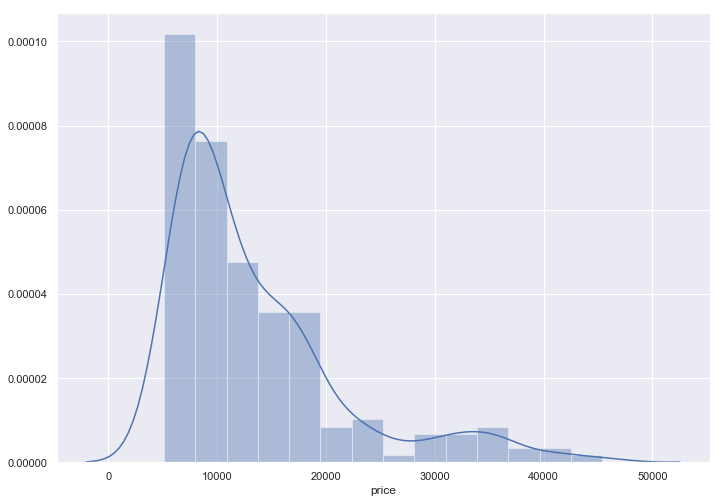

In [16]:
#plt.hist(df.price)
sns.distplot(df.price)

In [9]:
df.price.skew()

1.684325214046249

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

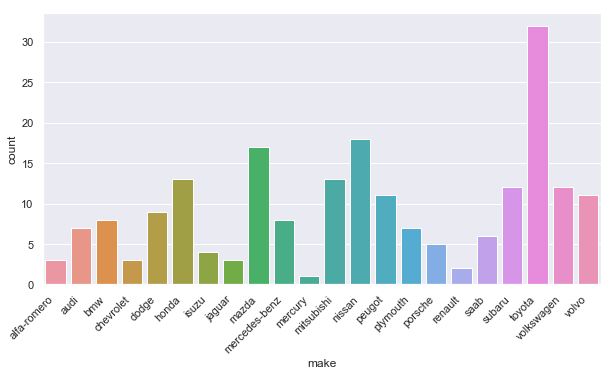

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df.make)
plt.xticks(rotation = 45,horizontalalignment='right')

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

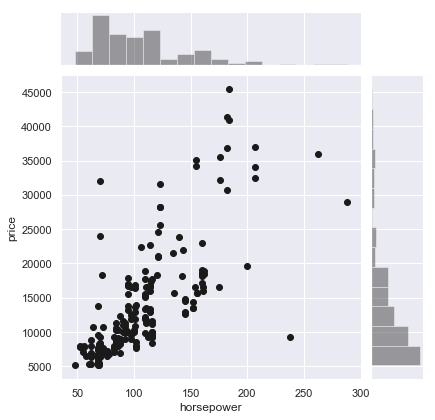

In [29]:
sns.jointplot(df.horsepower,df.price,kind="scatter",color ='k')

### Plot the insurance risk ratings for all the automobiles

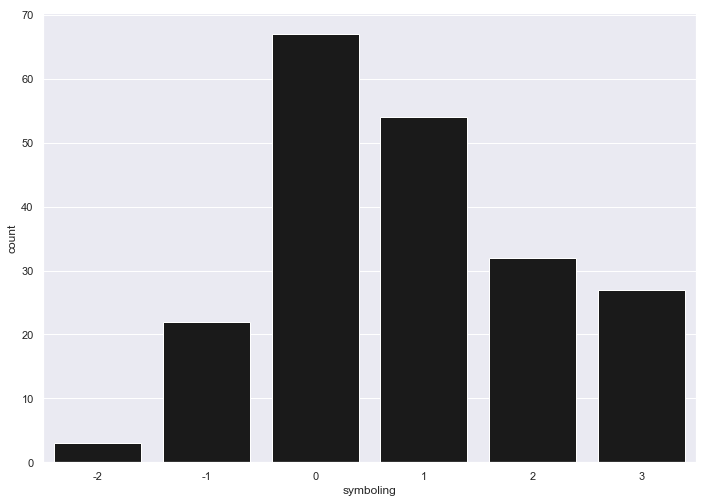

In [40]:
sns.countplot(df.symboling,color= 'k' )
#sns.barplot(df.symboling)

### Plot a pie chart of the fuel-type of the automobiles

In [1]:
df['fuel-type'].value_counts().plot(kind ='bar',autopct='%1.1f%%')
plt.show()

NameError: name 'df' is not defined

### Plot the pearson correlation of all the features in a heatmap.

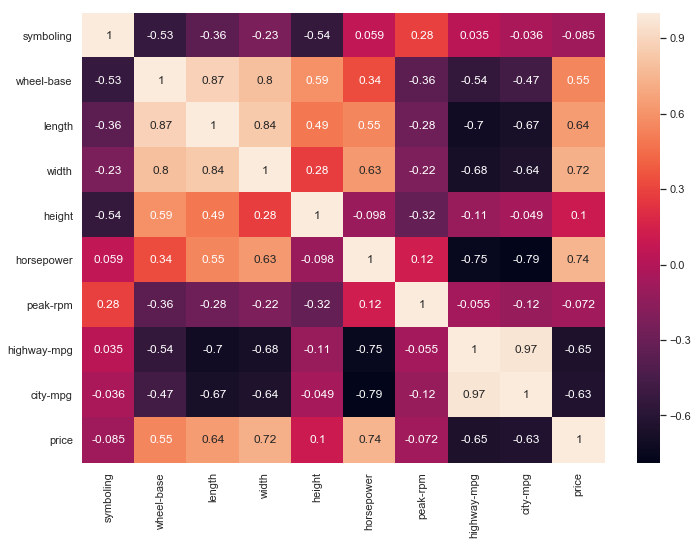

In [53]:
sns.heatmap(df.corr(),annot =True)
plt.show()

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

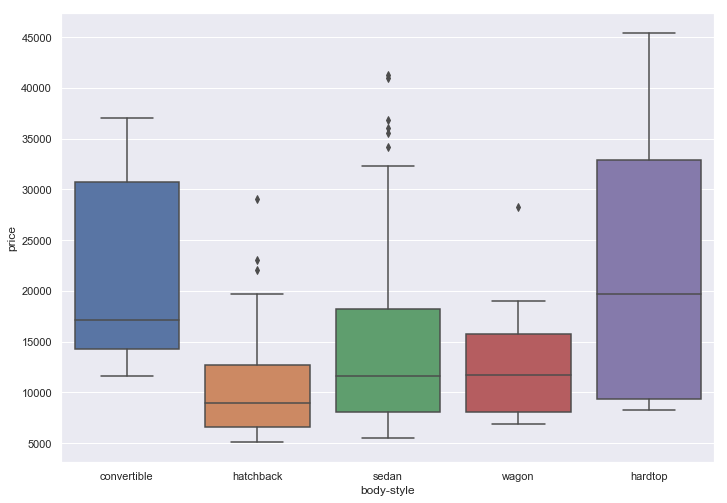

In [54]:
sns.boxplot(x='body-style',y='price',data = df)

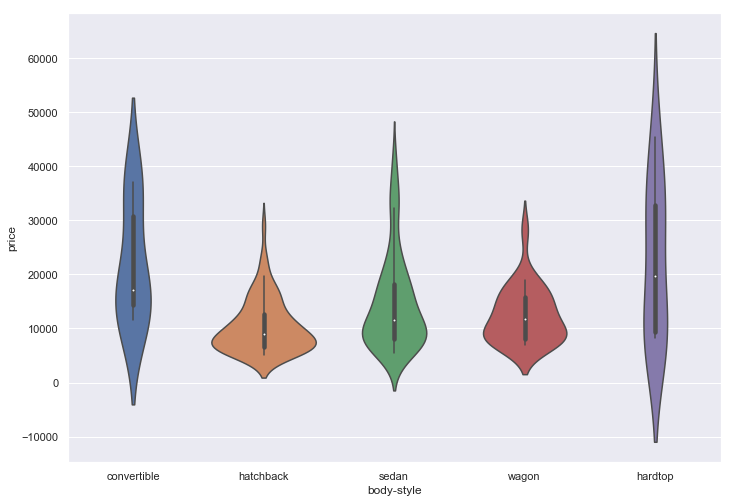

In [62]:
sns.violinplot(x='body-style',y='price',data = df)

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

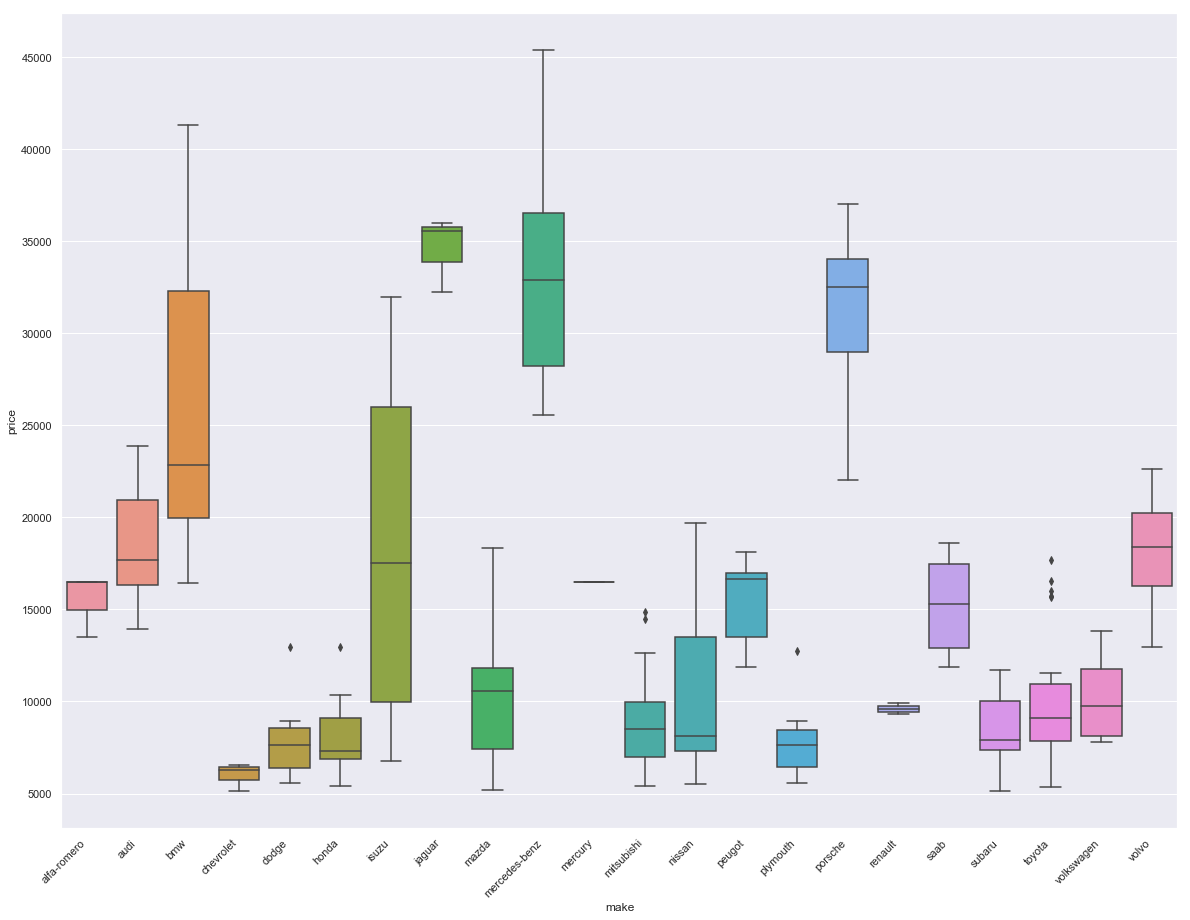

In [60]:
plt.figure(figsize=(20,15))
sns.boxplot(x='make',y='price',data = df)
plt.xticks(rotation = 45 ,horizontalalignment ='right')
plt.show()

## Data Preprocessing for the Automobile dataset

In [109]:
automobile = pd.read_csv('../data/Automobile_data.csv')
automobile.head()
#y = automobile[["price"]]
#automobile.drop("price",1,inplace=True)

symboling normalized-losses         make fuel-type   body-style  \
0          3                 ?  alfa-romero       gas  convertible   
1          3                 ?  alfa-romero       gas  convertible   
2          1                 ?  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  
2        154        19           26  16500  
3        102        24           30  13950  
4        115        18           22  17450

### Find out number of records having '?' value for normalized losses

In [110]:
(automobile['normalized-losses'] =='?').sum()

41

### Impute the missing values of the numerical data with mean of the column (`normalized-losses and horsepower`)  (Make sure you replace "?" by "NaN" for entire dataset before Imputing).

In [117]:
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',np.nan)
automobile['horsepower'] = automobile['horsepower'].replace('?',np.nan)

In [118]:
from sklearn.preprocessing import Imputer

In [119]:
nan_imputer = Imputer(strategy='mean')

In [120]:
nan_imputer.fit(automobile[['normalized-losses','horsepower']])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [121]:
automobile[['normalized-losses','horsepower']] = nan_imputer.transform(automobile[['normalized-losses','horsepower']])

In [122]:
automobile.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [123]:
automobile._get_numeric_data().columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [125]:
for col in automobile.dtypes[automobile.dtypes != object].index:
    if automobile[col].skew() > 1 :
        print(col)
        automobile[col] = np.sqrt(automobile[col])

engine-size
horsepower
price


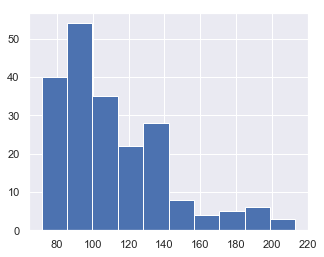

In [126]:
plt.figure(figsize = (5,4))
plt.hist(automobile.price)
plt.show()

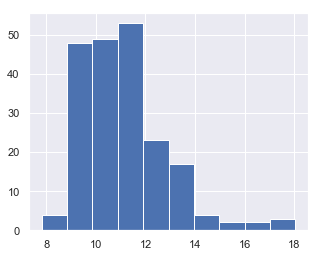

In [127]:
plt.figure(figsize = (5,4))
plt.hist(automobile['engine-size'])
plt.show()

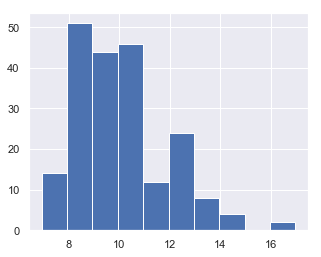

In [128]:
plt.figure(figsize = (5,4))
plt.hist(automobile['horsepower'])
plt.show()

### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [131]:
automobile['area'] = automobile['height'] * automobile['width']

0    3128.08
1    3128.08
2    3432.20
3    3594.66
4    3605.52
Name: area, dtype: float64


###  Label Encode the categorical features.


In [152]:
cat_cols = automobile.dtypes[automobile.dtypes == object].index
cat_cols

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [139]:
from sklearn.preprocessing import LabelEncoder

In [144]:
lb_make =LabelEncoder()
lb_make.fit_transform(automobile.make)

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17,
       17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21])

In [145]:
lb_make.classes_

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [146]:
for col in automobile.dtypes[automobile.dtypes == object].index:
       lb = LabelEncoder()
       lb.fit(automobile[col]) 
       automobile[col + '_bin'] = lb.transform(automobile[col])

In [154]:
automobile.drop(cat_cols,axis = 1,inplace =True)

In [155]:
automobile.head()

symboling  normalized-losses  width  height  engine-size  horsepower  \
0          3              122.0   64.1    48.8    11.401754   10.535654   
1          3              122.0   64.1    48.8    11.401754   10.535654   
2          1              122.0   65.5    52.4    12.328828   12.409674   
3          2              164.0   66.2    54.3    10.440307   10.099505   
4          2              164.0   66.4    54.3    11.661904   10.723805   

   city-mpg  highway-mpg       price     area  make_bin  fuel-type_bin  \
0        21           27  116.167982  3128.08         0              1   
1        21           27  128.452326  3128.08         0              1   
2        19           26  128.452326  3432.20         0              1   
3        24           30  118.110118  3594.66         1              1   
4        18           22  132.098448  3605.52         1              1   

   body-style_bin  drive-wheels_bin  engine-location_bin  engine-type_bin  
0               0                 2                    0                0  
1               0                 2                    0                0  
2               2                 2                    0                5  
3               3                 1                    0                3  
4               3                 0                    0                3

In [156]:
automobile.dtypes

symboling                int64
normalized-losses      float64
width                  float64
height                 float64
engine-size            float64
horsepower             float64
city-mpg                 int64
highway-mpg              int64
price                  float64
area                   float64
make_bin                 int32
fuel-type_bin            int32
body-style_bin           int32
drive-wheels_bin         int32
engine-location_bin      int32
engine-type_bin          int32
dtype: object

### Split the Independent features and target(`price`) variable into X and y. 

In [165]:
X = automobile.drop('price',axis = 1)
y = automobile.price

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'area', 'make_bin',
       'fuel-type_bin', 'body-style_bin', 'drive-wheels_bin',
       'engine-location_bin', 'engine-type_bin'],
      dtype='object')

### Split X and y into training and validation data and apply the Linear regression Model

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
Train_X,Test_X,Train_y,Test_y = train_test_split(X,y,test_size =0.2,random_state = 6)

### Print the different evaluation metrics like Mean Squared error, R2 Score, Mean Absolute Error and RMSE

In [170]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [172]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [174]:
def model_and_performance(model,model_name,Train_X,Test_X,Train_y,Test_y):
    model.fit(Train_X,Train_y)
    train_pred = model.predict(Train_X)
    test_pred =model.predict(Test_X)
    
    print('MSE', mean_squared_error(Train_y,train_pred),'MAE',mean_absolute_error(Train_y,train_pred),
          'R2', r2_score(Train_y,train_pred),'RMSE',math.sqrt(mean_squared_error(Train_y,train_pred)))
    
    print('MSE', mean_squared_error(Test_y,test_pred),'MAE',mean_absolute_error(Test_y,test_pred),
          'R2', r2_score(Test_y,test_pred),'RMSE',math.sqrt(mean_squared_error(Test_y,test_pred)))

In [175]:
model_and_performance(LinearRegression(),'Linear Model',Train_X,Test_X,Train_y,Test_y)

MSE 154.1379112643666 MAE 8.80218533199386 R2 0.8380293408820803 RMSE 12.415229005715787
MSE 107.63954608023639 MAE 7.795316819546191 R2 0.8561804296973026 RMSE 10.374948003736518


In [176]:
Train_y.mean()

110.9791752839268

In [1]:
import nltk

In [3]:
from nltk.tokenize import word_tokenize

# Thank You
***
### Next Session: Logistic Regression
For more queries - Reach out to academics@greyatom.com 